In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg


In [8]:
path = r"C:\Users\balaj\Desktop\Training\wrong_HOG_Mataji\MatajiGaushala_Cow_Female_4152na.png"
path = '/'.join(path.split('\\'))
print(path)

C:/Users/balaj/Desktop/Training/wrong_HOG_Mataji/MatajiGaushala_Cow_Female_4152na.png


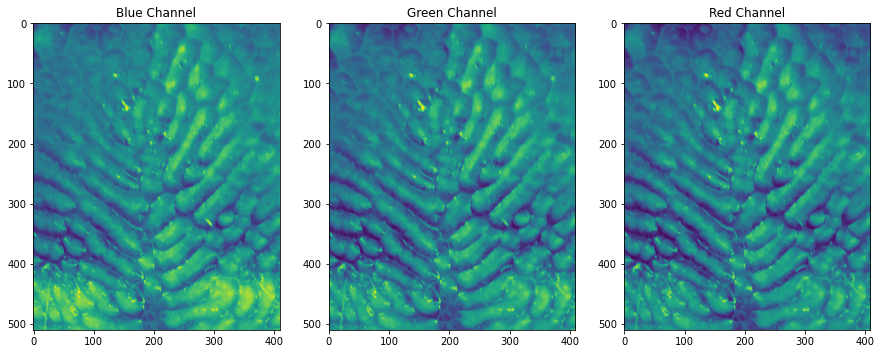

In [11]:
img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
# plt.imshow(img)
# plt.show()

# Splitting into channels
blue, green, red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize=(15, 7.2))
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()


In [12]:

#blue_temp_df = pd.DataFrame(data = blue)
# blue_temp_df

df_blue = blue/255
df_green = green/255
df_red = red/255


In [40]:

# Fit and transform the data in PCA
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)


In [41]:
# have fitted the data in PCA, check the shape of the transformed image of each channel
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)
# check the sum of explained variance ratios of the 50 PCA components (i.e. most dominated 50 Eigenvalues) for each channel.
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")


(510, 50)
(510, 50)
(510, 50)
Blue Channel : 0.9656138233425088
Green Channel: 0.9659381947245033
Red Channel  : 0.9635436587961393


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(510, 50)
(510, 409) (510, 409) (510, 409)
(510, 409, 3)


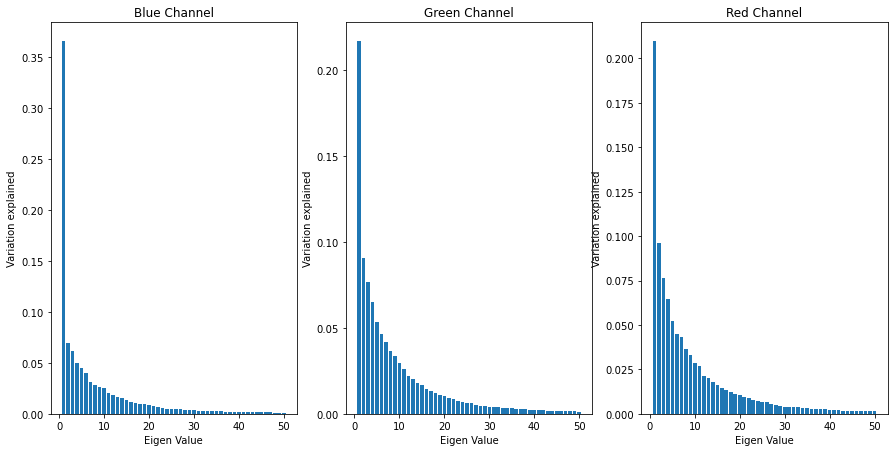

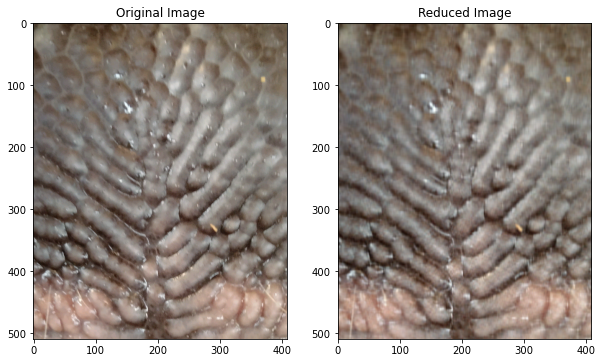

In [42]:
fig = plt.figure(figsize=(15, 7.2))
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1, 51)), pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1, 51)), pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1, 51)), pca_r.explained_variance_ratio_)
# plt.show()
print(trans_pca_g.shape)
# Reconstruction of Image & Visualization

b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

img_reduced = (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

fig = plt.figure(figsize=(10, 7.2))
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()
